In [1]:
## Importing The data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Dataset downloaded from NOAA ( National Oceanic and Atmospheric Administration )
weather = pd.read_csv("C:\\Users\\rohit\\OneDrive\\Desktop\\Data Analyst\\PortfolioProjects\\Helsinki Weather\\HelsinkiWeather.csv", index_col="DATE")

In [3]:
weather

,LOC,STATION,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
01/11/2005,Helsinki Airport,FIE00142080,0.00,NaN,6.67,7.22,4.44
02/11/2005,Helsinki Airport,FIE00142080,0.00,NaN,6.67,7.22,5.00
03/11/2005,Helsinki Airport,FIE00142080,0.00,NaN,8.89,10.00,6.67
04/11/2005,Helsinki Airport,FIE00142080,0.04,NaN,7.78,8.33,5.00
05/11/2005,Helsinki Airport,FIE00142080,0.22,NaN,8.33,9.44,7.22
...,...,...,...,...,...,...,...
01/11/2023,Helsinki Airport,FIE00142080,0.28,NaN,2.22,-17.78,0.56
02/11/2023,Helsinki Airport,FIE00142080,0.01,0.4,0.00,2.78,-2.78
03/11/2023,Helsinki Airport,FIE00142080,0.00,NaN,3.89,-17.78,-2.78


In [4]:
## Standardizing the data for Machine Learning

In [5]:
weather.columns

Index(['LOC', 'STATION', 'PRCP', 'SNWD', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [6]:
weather.columns = weather.columns.str.lower()
weather.columns

Index(['loc', 'station', 'prcp', 'snwd', 'tavg', 'tmax', 'tmin'], dtype='object')

In [7]:
weather.ffill(inplace=True)

In [8]:
weather.apply(pd.isnull).sum()

loc         0
station     0
prcp        0
snwd       25
tavg        0
tmax        0
tmin        0
dtype: int64

In [9]:
weather["snwd"].fillna(0, inplace=True)
weather["prcp"].fillna(0, inplace=True)

In [10]:
weather.apply(pd.isnull).sum()

loc        0
station    0
prcp       0
snwd       0
tavg       0
tmax       0
tmin       0
dtype: int64

In [11]:
weather['prcp'] = weather['prcp'].astype(float)
weather['snwd'] = weather['snwd'].astype(float)

In [12]:
weather.dtypes

loc         object
station     object
prcp       float64
snwd       float64
tavg       float64
tmax       float64
tmin       float64
dtype: object

In [13]:
weather.columns

Index(['loc', 'station', 'prcp', 'snwd', 'tavg', 'tmax', 'tmin'], dtype='object')

In [14]:
weather.index = pd.to_datetime(weather.index, format='%d/%m/%Y')

In [15]:
weather.index

DatetimeIndex(['2005-11-01', '2005-11-02', '2005-11-03', '2005-11-04',
               '2005-11-05', '2005-11-06', '2005-11-07', '2005-11-08',
               '2005-11-09', '2005-11-10',
               ...
               '2023-10-27', '2023-10-28', '2023-10-29', '2023-10-30',
               '2023-10-31', '2023-11-01', '2023-11-02', '2023-11-03',
               '2023-11-04', '2023-11-05'],
              dtype='datetime64[ns]', name='DATE', length=6579, freq=None)

In [16]:
weather.index.year.value_counts().sort_index()

2005     61
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    309
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

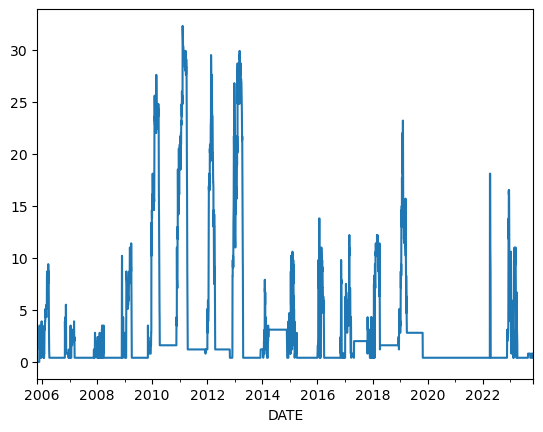

In [17]:
weather["snwd"].plot()

In [18]:
weather

,loc,station,prcp,snwd,tavg,tmax,tmin
DATE,,,,,,,
2005-11-01,Helsinki Airport,FIE00142080,0.00,0.0,6.67,7.22,4.44
2005-11-02,Helsinki Airport,FIE00142080,0.00,0.0,6.67,7.22,5.00
2005-11-03,Helsinki Airport,FIE00142080,0.00,0.0,8.89,10.00,6.67
2005-11-04,Helsinki Airport,FIE00142080,0.04,0.0,7.78,8.33,5.00
2005-11-05,Helsinki Airport,FIE00142080,0.22,0.0,8.33,9.44,7.22
...,...,...,...,...,...,...,...
2023-11-01,Helsinki Airport,FIE00142080,0.28,0.4,2.22,-17.78,0.56
2023-11-02,Helsinki Airport,FIE00142080,0.01,0.4,0.00,2.78,-2.78
2023-11-03,Helsinki Airport,FIE00142080,0.00,0.4,3.89,-17.78,-2.78


In [19]:
## Preparing Machine Learning Model

In [20]:
# Predicting tomorrows TMAX (Maximum Temprature) as Target

In [21]:
weather["target"] = weather.shift(-1)['tmax']

In [22]:
# New column has been added
weather

,loc,station,prcp,snwd,tavg,tmax,tmin,target
DATE,,,,,,,,
2005-11-01,Helsinki Airport,FIE00142080,0.00,0.0,6.67,7.22,4.44,7.22
2005-11-02,Helsinki Airport,FIE00142080,0.00,0.0,6.67,7.22,5.00,10.00
2005-11-03,Helsinki Airport,FIE00142080,0.00,0.0,8.89,10.00,6.67,8.33
2005-11-04,Helsinki Airport,FIE00142080,0.04,0.0,7.78,8.33,5.00,9.44
2005-11-05,Helsinki Airport,FIE00142080,0.22,0.0,8.33,9.44,7.22,9.44
...,...,...,...,...,...,...,...,...
2023-11-01,Helsinki Airport,FIE00142080,0.28,0.4,2.22,-17.78,0.56,2.78
2023-11-02,Helsinki Airport,FIE00142080,0.01,0.4,0.00,2.78,-2.78,-17.78
2023-11-03,Helsinki Airport,FIE00142080,0.00,0.4,3.89,-17.78,-2.78,-17.78


In [23]:
# Filling the NaN values
weather.ffill()

,loc,station,prcp,snwd,tavg,tmax,tmin,target
DATE,,,,,,,,
2005-11-01,Helsinki Airport,FIE00142080,0.00,0.0,6.67,7.22,4.44,7.22
2005-11-02,Helsinki Airport,FIE00142080,0.00,0.0,6.67,7.22,5.00,10.00
2005-11-03,Helsinki Airport,FIE00142080,0.00,0.0,8.89,10.00,6.67,8.33
2005-11-04,Helsinki Airport,FIE00142080,0.04,0.0,7.78,8.33,5.00,9.44
2005-11-05,Helsinki Airport,FIE00142080,0.22,0.0,8.33,9.44,7.22,9.44
...,...,...,...,...,...,...,...,...
2023-11-01,Helsinki Airport,FIE00142080,0.28,0.4,2.22,-17.78,0.56,2.78
2023-11-02,Helsinki Airport,FIE00142080,0.01,0.4,0.00,2.78,-2.78,-17.78
2023-11-03,Helsinki Airport,FIE00142080,0.00,0.4,3.89,-17.78,-2.78,-17.78


In [24]:
## Building the model

In [25]:
rr = Ridge(alpha=0.1)

In [26]:
# Removing the columns that we do not need
predictors = weather.columns[~weather.columns.isin(["target", "loc", "station"])]

In [27]:
predictors

Index(['prcp', 'snwd', 'tavg', 'tmax', 'tmin'], dtype='object')

In [28]:
# Function for backtesting a machine learning model on time-series weather data
def backtest(weather, model, predictors, start=1156, step=60):
    all_predictions = []
    
    # Iterate through the data, training the model on past data and predicting on future data
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :]
        test = weather.iloc[i:(i+step), :]
        
        # Train the machine learning model on the training data
        model.fit(train[predictors], train["target"])
        # Make predictions on the test set, calculate the absolute difference, and handle missing values
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]        
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        combined["actual"].fillna(method='ffill', inplace=True)
        combined["diff"].fillna(0, inplace=True)
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [29]:
# Generate predictions using the backtest function for the specified weather data, Ridge model (rr), and predictors
predictions = backtest(weather, rr, predictors)

In [30]:
predictions

,actual,prediction,diff
DATE,,,
2008-12-31,-0.56,0.985922,1.545922
2009-01-01,-7.78,-1.701296,6.078704
2009-01-02,-9.44,-7.730077,1.709923
2009-01-03,-7.78,-8.165426,0.385426
2009-01-04,-7.78,-7.468013,0.311987
...,...,...,...
2023-11-01,2.78,-5.724659,8.504659
2023-11-02,-17.78,3.168000,20.948000
2023-11-03,-17.78,-3.087922,14.692078


In [31]:
## Checking the accuracy of the model

In [32]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

2.060307545308977

In [33]:
mean_squared_error(predictions["actual"], predictions["prediction"])

9.043578842444797

In [34]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2018-05-30,-17.78,23.171790,40.951790
2023-10-04,-17.78,21.697772,39.477772
2018-09-06,-17.78,20.754305,38.534305
2018-09-02,-17.78,20.184842,37.964842
2023-10-02,-17.78,15.555117,33.335117
...,...,...,...
2014-05-12,11.67,11.668219,0.001781
2016-04-14,7.22,7.221657,0.001657
2014-10-27,12.22,12.219461,0.000539


In [35]:
## Visualising the model's performance

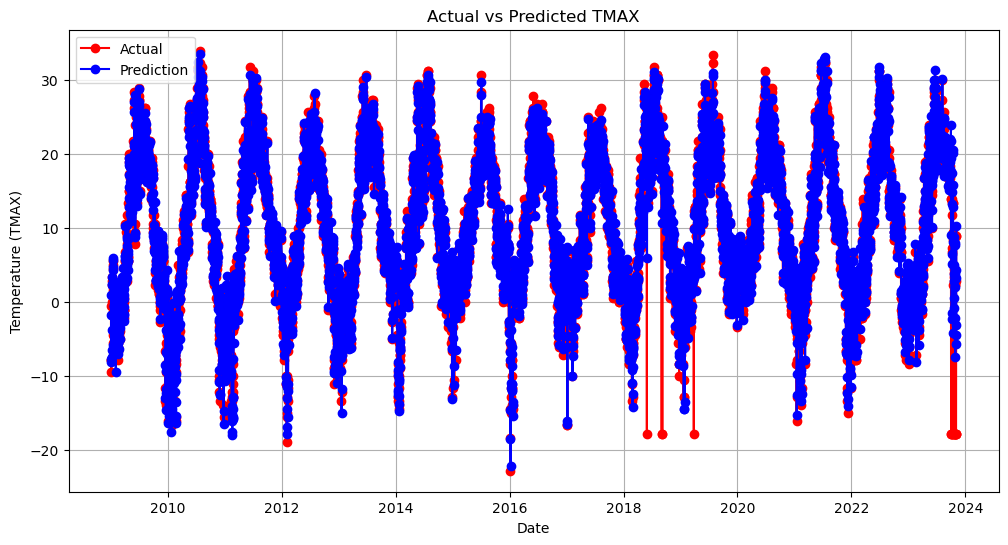

In [36]:
# Plotting the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(predictions.index, predictions['actual'], label='Actual', marker='o', color='red')
plt.plot(predictions.index, predictions['prediction'], label='Prediction', marker='o', color='blue')
plt.title('Actual vs Predicted TMAX')
plt.xlabel('Date')
plt.ylabel('Temperature (TMAX)')
plt.legend()
plt.grid(True)
plt.show()

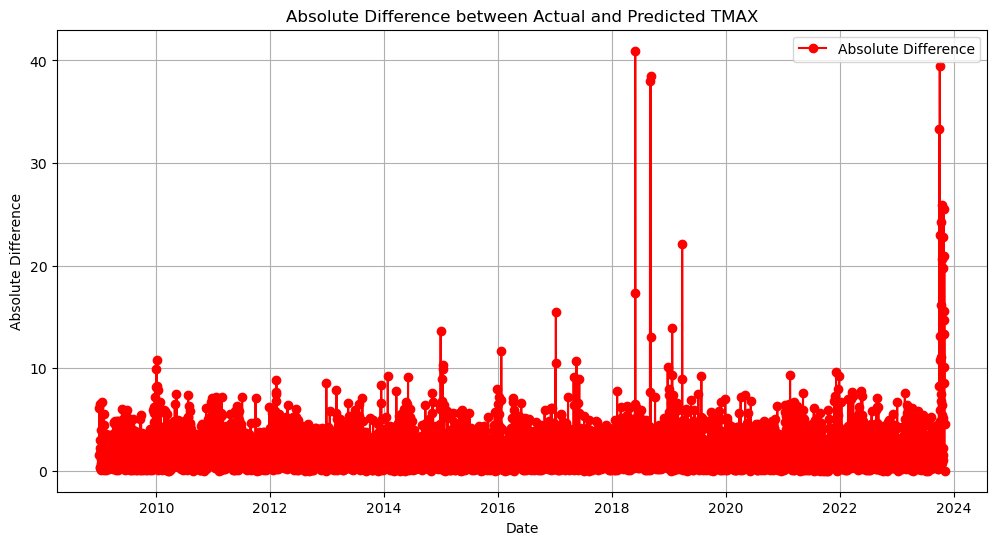

In [37]:
# Plotting the differences
plt.figure(figsize=(12, 6))
plt.plot(predictions.index, predictions['diff'], label='Absolute Difference', color='red', marker='o')
plt.title('Absolute Difference between Actual and Predicted TMAX')
plt.xlabel('Date')
plt.ylabel('Absolute Difference')
plt.legend()
plt.grid(True)
plt.show()